**Regression & Forecasting:**

In this session [Multiple Liner Regression](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) (Descriptive and Predictive), [Polynomial Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), and [Timeseries models](https://www.statsmodels.org/stable/tsa.html) will be presented. You can find the datasets here: [life expectancy](https://drive.google.com/file/d/1JbIYKkp6N4C16ixcEe7zDQ536ksYr7Wr/view?usp=sharing).

Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

## Multiple Linear Regression

Read the Data:

In [ ]:
Forecasting_data = pd.read_csv("/content/life_dexpectency.csv") # life_expectancy dataset

print(Forecasting_data.columns)
Forecasting_data.head(3)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [ ]:
Forecasting_data.info()
Forecasting_data.dropna(inplace=True)
Forecasting_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 0 to 1989
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1579 non-null   object 
 1   Year                             1579 non-null   int64  
 2   Status                           1579 non-null   object 
 3   Life expectancy                  1579 non-null   float64
 4   Adult Mortality                  1579 non-null   float64
 5   infant deaths                    1579 non-null   int64  
 6   Alcohol                          1579 non-null   float64
 7   percentage expenditure           1579 non-null   float64
 8   Hepatitis B                      1579 non-null   float64
 9   Measles                          1579 non-null   int64  
 10  BMI                              1579 non-null   float64
 11  under-five deaths                1579 non-null   int64  
 12  Polio               

Split the data into train and test subsets (Note: Time series data cannot be randomly subsampled):

In [ ]:
## using life expectency dataset
X = Forecasting_data.iloc[:, 4:]
y = Forecasting_data.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

X_train.shape

(1184, 18)

Train linear regression model:

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:53.294539125871935

Estiamted coefficients:[-1.78858020e-02  9.44143574e-02 -5.59347397e-02  4.95675263e-04
 -4.97152971e-03 -1.52782559e-05  2.23746537e-02 -6.94784460e-02
  3.28862607e-03  6.85316819e-02  1.77698109e-02 -4.26957277e-01
 -1.06982534e-05  8.69117744e-11 -3.79821240e-03 -6.51336795e-02
  1.11031486e+01  8.72767720e-01]


Linear Regression Equation:   $ŷ = β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k}$

Test the prediction performance:

In [ ]:
y_pred = linear_reg.predict(X_test)

# using sklearn metrics
MSE_sk = metrics.mean_squared_error(y_test, y_pred)
print(f"MSE: {MSE_sk}")
MAE_sk = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {MAE_sk}")
MAPE_sk = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {MAPE_sk}")

MSE: 13.175918026295063
MAE: 2.7992174550629
MAPE: 0.04283894398151048


### Statistical Analysis of Linear Regression

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) # Add a column of ones to an array to estimate the intercept.
model = sm.OLS(y_train, X_train) #endog: dependent variable, exog: regressors
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     331.9
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:29:32   Log-Likelihood:                -3189.6
No. Observations:                1184   AIC:                             6417.
Df Residuals:                    1165   BIC:                             6514.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Polynomial Regression

Best Polynomial degree: 7


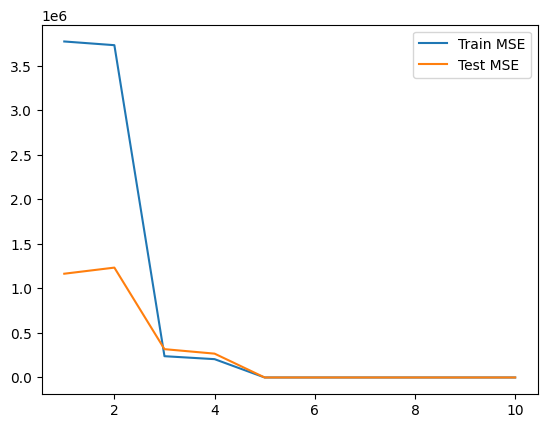

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate some random data
np.random.seed(0)
X = 2 * np.random.randn(100,1) #uniform(-1, 1, size=100).reshape(-1, 1)
y = 5* X**5 - 2 * X**3 + 3 * X**2 + 5 * X + 2 + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression
train_MSE = []
test_MSE = []

for degree in range(1,11): # Degree of the polynomial
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Train a linear regression model on the polynomial features
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Make predictions on the training set
    y_train_pred = lin_reg.predict(X_poly_train)

    # Make predictions on the test set
    y_test_pred = lin_reg.predict(X_poly_test)

    # Evaluate the model
    train_error = metrics.mean_squared_error(y_train, y_train_pred)
    test_error = metrics.mean_squared_error(y_test, y_test_pred)
    train_MSE.append(train_error)
    test_MSE.append(test_error)

print(f'Best Polynomial degree: {test_MSE.index(min(test_MSE)) +1}')
# Plot the results
plt.plot(range(1,11), train_MSE, label='Train MSE')
plt.plot(range(1,11), test_MSE, label='Test MSE')
plt.legend()

Plot the model with the lowest test error:

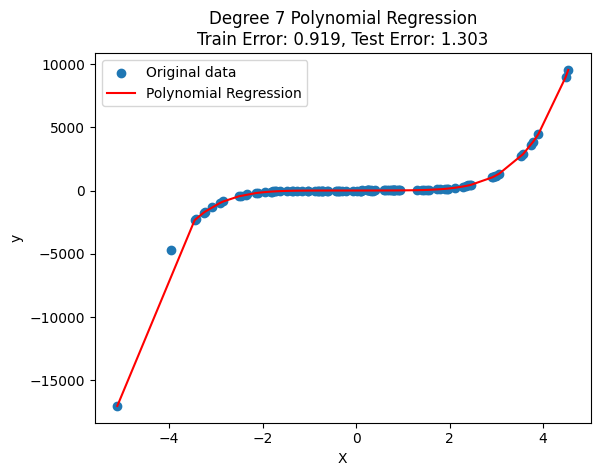

In [ ]:
degree=7
poly_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train a linear regression model on the polynomial features
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly_train, y_train)

# Make predictions on the training set
y_train_pred = lin_reg.predict(X_poly_train)

# Make predictions on the test set
y_test_pred = lin_reg.predict(X_poly_test)

# Plot the results
plt.scatter(X, y, label='Original data')
plt.plot(np.sort(X_train, axis=0), np.sort(y_train_pred, axis=0), color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title(f'Degree {degree} Polynomial Regression\nTrain Error: {train_MSE[degree-1]:.3f}, Test Error: {test_MSE[degree-1]:.3f}')
plt.show()

## Time Series

Autoregressive model:

### Moving Average:

[*********************100%%**********************]  1 of 1 completed


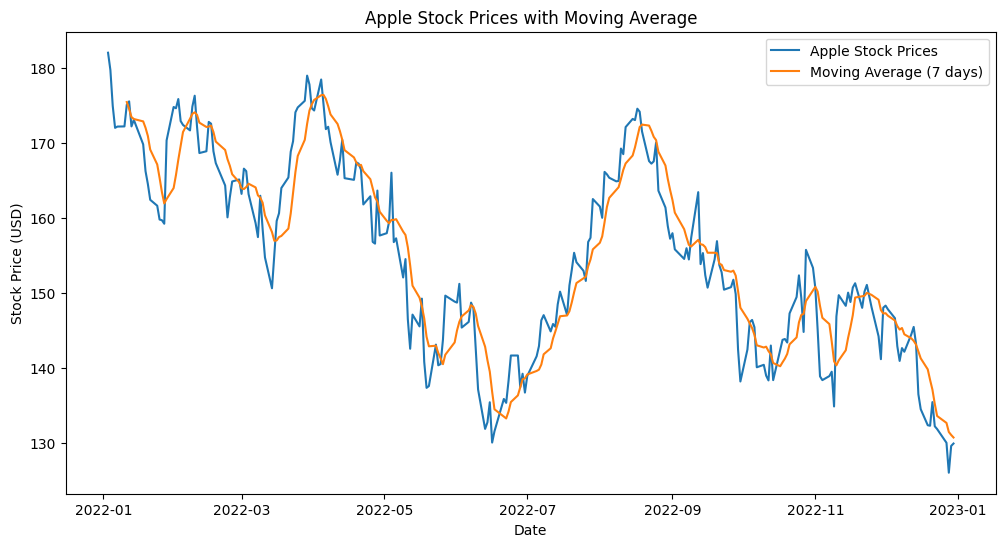

In [ ]:
# Fetch Apple stock prices (you'll need to install yfinance first: pip install yfinance)
import yfinance as yf

# Download historical data
symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"
apple_stock = yf.download(symbol, start=start_date, end=end_date)

# Calculate the moving average
window_size = 7  # You can adjust this parameter based on your preference
apple_stock['Moving_Avg'] = apple_stock['Close'].rolling(window=window_size).mean()

# Plot the original closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(apple_stock['Close'], label='Apple Stock Prices')
plt.plot(apple_stock['Moving_Avg'], label=f'Moving Average ({window_size} days)')
plt.title('Apple Stock Prices with Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Create features (use past 'window_size' days' moving averages as features)
for i in range(1, window_size + 1):
    apple_stock[f'MA_Lag_{i}'] = apple_stock['Moving_Avg'].shift(i)

apple_stock.head(9)

,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,MA_Lag_1,MA_Lag_2,MA_Lag_3,MA_Lag_4,MA_Lag_5,MA_Lag_6,MA_Lag_7
Date,,,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-10,169.080002,172.500000,168.169998,172.190002,170.244827,106765600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,172.320007,175.179993,170.820007,175.080002,173.102188,76138300,175.438570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-12,176.119995,177.179993,174.820007,175.529999,173.547104,74805200,174.512857,175.438570,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-13,175.779999,176.619995,171.789993,172.190002,170.244827,84505800,173.440000,174.512857,175.43857,NaN,NaN,NaN,NaN,NaN


Mean Squared Error: 13.665560044035187


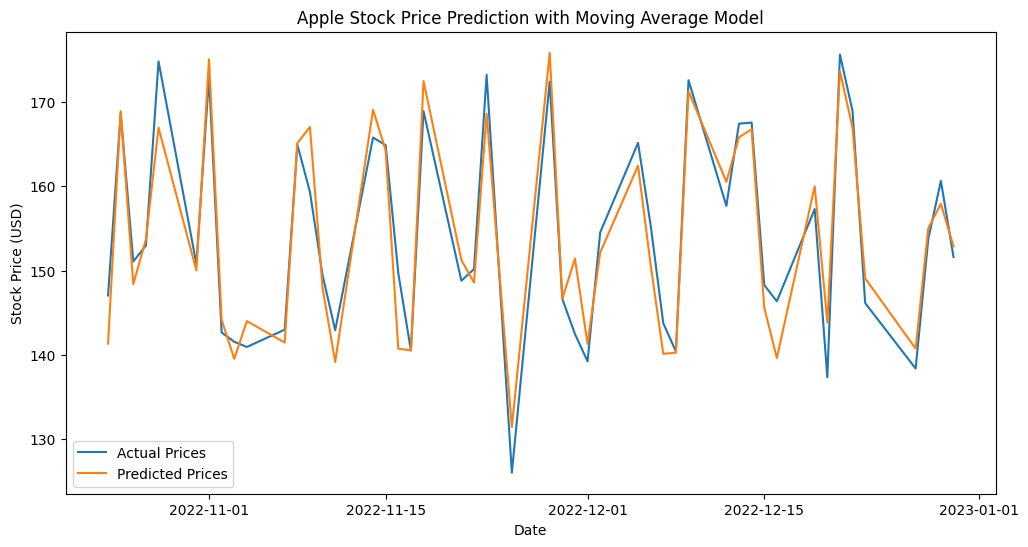

In [ ]:
# Drop NaN values resulting from the rolling mean and lag features
apple_stock = apple_stock.dropna()

# Prepare features and target variable
X = apple_stock.drop(['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume', 'Moving_Avg',], axis=1)
y = apple_stock['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(apple_stock.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(apple_stock.index[-len(y_test):], y_pred, label='Predicted Prices')
plt.title('Apple Stock Price Prediction with Moving Average Model')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

### Autoregressive Integrated Moving Average (ARIMA):

Using the statmodels' Time Series analysis library (tsa):

Find the documents [here](https://www.statsmodels.org/stable/tsa.html).

Mean Squared Error: 13.718160627776234



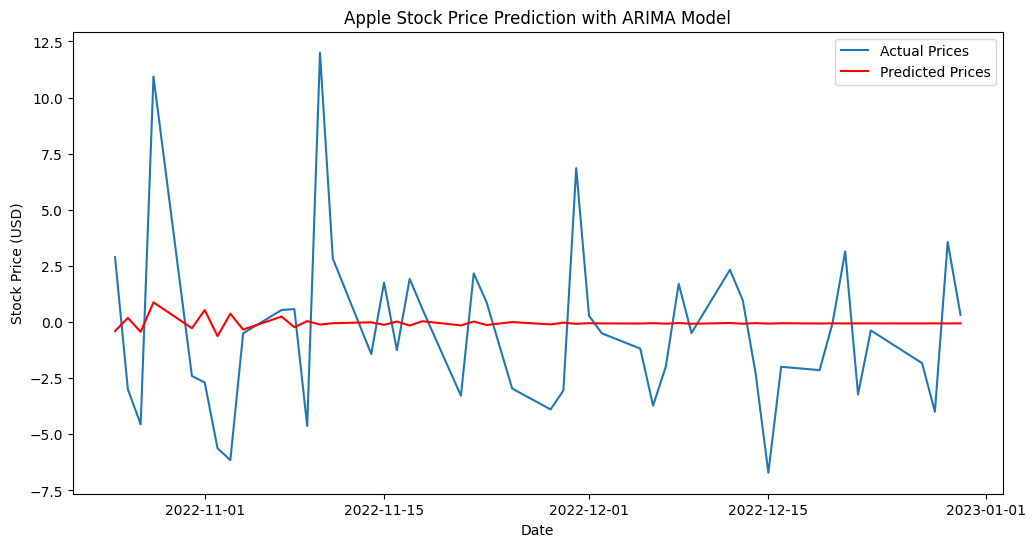

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# import warnings
# warnings.filterwarnings("ignore")

# Take the first difference to make the data stationary
apple_close = apple_stock["Close"].diff().dropna()

# Split the data into training and testing sets
train_size = int(len(apple_stock) * 0.8)
train_data = apple_close[:train_size]
test_data = apple_close[train_size:]

# Fit ARIMA model
order = (7, 0, 2)  # (p, d, q) parameters for ARIMA: try p = 7, 4
model = ARIMA(train_data, order=order)
fit_model = model.fit()

# Make predictions on the test set
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = fit_model.predict(start=start_index, end=end_index, typ='levels')

# Evaluate the model
mse = metrics.mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}\n')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(test_data.index, predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

#### Model Indentification:

In [ ]:
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  190
Model:                 ARIMA(7, 0, 2)   Log Likelihood                -494.661
Date:                Sat, 27 Jan 2024   AIC                           1011.321
Time:                        20:36:20   BIC                           1047.039
Sample:                             0   HQIC                          1025.790
                                - 190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0577      0.277     -0.208      0.835      -0.600       0.485
ar.L1         -1.2559      0.699     -1.798      0.072      -2.625       0.113
ar.L2         -0.4223      0.680     -0.621      0.5